<img src= "https://i.pinimg.com/564x/76/91/87/76918797dfea93abead3144fb6b2ce7d.jpg" style="width:1200px;height:700px;padding-left:180px"/>

# Si la Tierra está cambiando, ¿por qué nosotros no?
### Analisis del Cambio Climatico

El cambio climático es un dilema que la sociedad viene arrastrando hace décadas. Si bien es una situación que se tenía conocimiento desde numerosos años, no es hace mucho cuando la conciencia y las medidas se pusieron sobre la palestra. Es una problemática que atormenta gravemente en su paulatino aumento a las futuras generaciones. Los niveles de dióxido de carbono (CO2) y de otros gases de efecto invernadero en la atmósfera aumentaron cada vez alcanzan nuevos niveles más altos. A inicios de 2021, el IPCC –Panel Intergubernamental de Expertos en el Cambio Climático (órgano de las Naciones Unidas para la evaluación de la ciencia relacionada con este último)-publicó su último reporte de casi cuatro mil páginas que dejo claro la emergencia
meteorológica en la cual nos vemos envueltos. Este expresa duramente que si no se hace un severo cambio de aquí a 20 años más llegaremos al punto de no-retorno. Nosotros queremos generar conciencia con datos para que esta emergencia climática que vivimos en la actualidad sea percibida con más peso. Sabemos que los grandes cambios comienzan de cambios pequeños, por esta razón, nuestro proyecto está dirigido informar y concientizar, demostrando lo rápido que se ha deteriorado el estado de la tierra en la última década. Luego hacer la relación, con dos temas importantes que afectan en mayor parte a la problemática medioambiental: la sobrepoblación y la emision de gases a niveles exuberantes.

A lo largo del trabajo queremos responder las siguientes preguntas: 
1. ¿Aproximadamente cuál será la temperatura media en 2030, si seguimos las condiciones que
estamos?
2. ¿Aproximadamente cuál será la cantidad de CO2 emitido en el 2030, si seguimos en las
condiciones que estamos?
3. ¿Aproximadamente cuál será la cantidad de gas metano emitido en el 2030, si seguimos en las
condiciones que estamos?
4. ¿Cuál es el país que emite más dióxido de carbono a la atmosfera la última década (2010-2020)?

### Datos utilizados

Data Emisiones de CO2: Distribuido por Our World In Data(OWID) que brinda datos sobre la emisión de CO2 por diferentes países a lo largo de los años.
Methane Emission per Country: Este dataset también lo obtuvimos de OWID y contiene información de la emisión de metano. 
Ambos dataset son utilizados para analizar la contaminación.
Cattle livestock count-heads: Obtenido de OWID, aquí encontramos registros de la cantidad de ganado de varios países durante años que utilizaremos para establecer una relación entre la contaminación y la industria ganadera. 
GlobalLandTemperaturesByCountry |: Información de los promedios de temperatura de distintos países que consideramos desde el año 2000.

In [1]:
!pip install geopandas

In [2]:
#Importacion de modulos importantes para la Investigacion
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# ANALISIS EXPLORATORIO


· Primero, comenzaremos abriendo la data de emisiones de dioxido de carbono en la atmosfera. 

In [3]:
df_co2_emissions = pd.read_csv('Data Emisiones de CO2.csv')
df_co2_emissions

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13.308,1.65,0.198,1.138,0.881,0.963,...,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
24647,ZWE,Zimbabwe,2016,10.815,12.171,-11.14,-1.356,1.356,0.771,0.868,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
24648,ZWE,Zimbabwe,2017,10.247,11.774,-5.25,-0.568,1.527,0.720,0.827,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
24649,ZWE,Zimbabwe,2018,11.341,12.815,10.67,1.094,1.475,0.785,0.888,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN


In [4]:
df_co2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24651 entries, 0 to 24650
Data columns (total 58 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             21489 non-null  object 
 1   country                              24651 non-null  object 
 2   year                                 24651 non-null  int64  
 3   co2                                  23403 non-null  float64
 4   consumption_co2                      3815 non-null   float64
 5   co2_growth_prct                      24383 non-null  float64
 6   co2_growth_abs                       23042 non-null  float64
 7   trade_co2                            3815 non-null   float64
 8   co2_per_capita                       22735 non-null  float64
 9   consumption_co2_per_capita           3815 non-null   float64
 10  share_global_co2                     23403 non-null  float64
 11  cumulative_co2              

Nos vamos a quedar solo con las columnas relevantes para nuestra investigacion.

In [5]:
keep_cols = ['iso_code', 'country', 'year', 'co2', 'population' ]
df_co2_emissions = df_co2_emissions[keep_cols]
filtro = df_co2_emissions['iso_code'] != "OWID_WRL"
df_co2_emissions = df_co2_emissions[filtro]
df_co2_emissions = df_co2_emissions.dropna()
df_co2_emissions

,iso_code,country,year,co2,population
0,AFG,Afghanistan,1949,0.015,7624058.0
1,AFG,Afghanistan,1950,0.084,7752117.0
2,AFG,Afghanistan,1951,0.092,7840151.0
3,AFG,Afghanistan,1952,0.092,7935996.0
4,AFG,Afghanistan,1953,0.106,8039684.0
...,...,...,...,...,...
24646,ZWE,Zimbabwe,2015,12.170,13814642.0
24647,ZWE,Zimbabwe,2016,10.815,14030338.0
24648,ZWE,Zimbabwe,2017,10.247,14236599.0
24649,ZWE,Zimbabwe,2018,11.341,14438812.0


In [36]:
df_co2_emissions.head()


,iso_code,country,year,co2,population
0,AFG,Afghanistan,1949,0.015,7624058.0
1,AFG,Afghanistan,1950,0.084,7752117.0
2,AFG,Afghanistan,1951,0.092,7840151.0
3,AFG,Afghanistan,1952,0.092,7935996.0
4,AFG,Afghanistan,1953,0.106,8039684.0


In [34]:
df_co2_emissions.tail()



,iso_code,country,year,co2,population
24646,ZWE,Zimbabwe,2015,12.170,13814642.0
24647,ZWE,Zimbabwe,2016,10.815,14030338.0
24648,ZWE,Zimbabwe,2017,10.247,14236599.0
24649,ZWE,Zimbabwe,2018,11.341,14438812.0
24650,ZWE,Zimbabwe,2019,10.374,14645473.0


In [35]:
df_co2_emissions.describe()

,year,co2,population
count,20170.000000,20170.000000,2.017000e+04
mean,1960.150570,79.833800,2.321883e+07
std,45.438192,418.145651,9.004343e+07
min,1800.000000,0.000000,1.490000e+03
25%,1936.000000,0.469000,1.354680e+06
50%,1970.000000,3.682500,4.729523e+06
75%,1995.000000,27.147000,1.450665e+07
max,2019.000000,10174.681000,1.433784e+09


Ahora empezaré a analizar estos datos. Primero quiero saber como ha evolucionado la emision de CO2 con el pasar de las decadas 

In [6]:
def obtener_totalco2_x_ano(ano):
    filtro = df_co2_emissions['year'] == ano
    df_co2_emissions_nuevo = df_co2_emissions[filtro]
    print(f"\n\nCO2 EMITIDO EN {ano}:{df_co2_emissions_nuevo['co2'].sum()}")
    return df_co2_emissions_nuevo['co2'].sum()
    

In [7]:
def promedio_co2_decada(lista):
    divisor = len(lista)
    suma = sum(lista)
    resultado = suma / divisor 
    return resultado


In [8]:
lista_decada_1980 = []
for a in range(1980,1990):
    lista_decada_1980.append(obtener_totalco2_x_ano(a))



CO2 EMITIDO EN 1980:18921.724


CO2 EMITIDO EN 1981:18427.853


CO2 EMITIDO EN 1982:18326.259


CO2 EMITIDO EN 1983:18516.631999999998


CO2 EMITIDO EN 1984:19065.359


CO2 EMITIDO EN 1985:19747.987999999998


CO2 EMITIDO EN 1986:20006.817999999996


CO2 EMITIDO EN 1987:20531.554000000004


CO2 EMITIDO EN 1988:21317.072


CO2 EMITIDO EN 1989:21626.943999999996


Entre 1980 a 1989, los valores de las emisiones de dioxioxido de carbono parten a iniciios de decada con 76563.972 y termina con 86013.824. En un solo ano el valor aumento mas de un 10% 



In [9]:
print(f"Promedio desde 1980 a 1989: {promedio_co2_decada(lista_decada_1980)}")

Promedio desde 1980 a 1989: 19648.820299999996


In [10]:
lista_decada_1990 = []
for a in range(1990,2000):
    lista_decada_1990.append(obtener_totalco2_x_ano(a))



CO2 EMITIDO EN 1990:22134.184


CO2 EMITIDO EN 1991:22143.910000000003


CO2 EMITIDO EN 1992:21887.506


CO2 EMITIDO EN 1993:22122.93


CO2 EMITIDO EN 1994:22259.984


CO2 EMITIDO EN 1995:22715.849000000002


CO2 EMITIDO EN 1996:23380.743000000002


CO2 EMITIDO EN 1997:23485.612999999998


CO2 EMITIDO EN 1998:23363.968


CO2 EMITIDO EN 1999:23658.618


In [11]:
print(f"Promedio desde 1980 a 1989: {promedio_co2_decada(lista_decada_1990)}")

Promedio desde 1980 a 1989: 22715.330500000004


In [12]:
lista_decada_2000 = []
for a in range(2000,2010):
    lista_decada_2000.append(obtener_totalco2_x_ano(a))



CO2 EMITIDO EN 2000:24336.621


CO2 EMITIDO EN 2001:24553.436999999998


CO2 EMITIDO EN 2002:25114.493000000002


CO2 EMITIDO EN 2003:26344.638999999996


CO2 EMITIDO EN 2004:27567.201


CO2 EMITIDO EN 2005:28470.705


CO2 EMITIDO EN 2006:29382.238000000005


CO2 EMITIDO EN 2007:30243.581


CO2 EMITIDO EN 2008:30873.876000000004


CO2 EMITIDO EN 2009:30435.804


In [13]:
print(f"Promedio desde 1980 a 1989: {promedio_co2_decada(lista_decada_2000)}")

Promedio desde 1980 a 1989: 27732.259500000004


In [14]:
lista_decada_2010 = []
for a in range(2010,2020):
    lista_decada_2010.append(obtener_totalco2_x_ano(a))



CO2 EMITIDO EN 2010:32041.289


CO2 EMITIDO EN 2011:33090.153


CO2 EMITIDO EN 2012:33649.688


CO2 EMITIDO EN 2013:33860.449


CO2 EMITIDO EN 2014:34108.775


CO2 EMITIDO EN 2015:34032.836


CO2 EMITIDO EN 2016:34023.512


CO2 EMITIDO EN 2017:34437.342


CO2 EMITIDO EN 2018:35141.43


CO2 EMITIDO EN 2019:35161.702


In [15]:
print(f"Promedio desde 1980 a 1989: {promedio_co2_decada(lista_decada_2010)}")

Promedio desde 1980 a 1989: 33954.717599999996


In [16]:
df_co2_barras = pd.DataFrame()
df_co2_barras['1980-1989'] = lista_decada_1980
df_co2_barras['1990-1999'] = lista_decada_1990
df_co2_barras['2000-2009'] = lista_decada_2000
df_co2_barras['2010-2019'] = lista_decada_2010
df_co2_barras


,1980-1989,1990-1999,2000-2009,2010-2019
0,18921.724,22134.184,24336.621,32041.289
1,18427.853,22143.910,24553.437,33090.153
2,18326.259,21887.506,25114.493,33649.688
3,18516.632,22122.930,26344.639,33860.449
4,19065.359,22259.984,27567.201,34108.775
5,19747.988,22715.849,28470.705,34032.836
6,20006.818,23380.743,29382.238,34023.512
7,20531.554,23485.613,30243.581,34437.342
8,21317.072,23363.968,30873.876,35141.430
9,21626.944,23658.618,30435.804,35161.702


<AxesSubplot:>

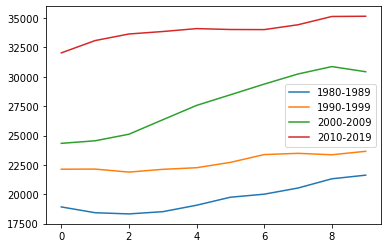

In [17]:
df_co2_barras.plot()

En el grafico podemos ver la variacion de emisiones totales de diaxido de carbono expulsadas en una decada, tambien podemos hacer la comparacion en cuanto a sus magnitudes.

Para terminar de analizar este dataset, me gustaria saber cuales son los paises que mas co2 emiten durante el ultimo ano.(en la actualidad)

In [18]:
def obtener_pais(ano):
    filtro = df_co2_emissions['year'] == ano
    df_co2_emissions_nuevo = df_co2_emissions[filtro]
    return df_co2_emissions_nuevo
    

In [19]:
df_paises_co2 = obtener_pais(2019)
mayor_digito = max(df_paises_co2['co2'])
filtro = df_paises_co2['co2'] == mayor_digito
print(df_paises_co2[filtro])

df_paises_co2 = obtener_pais(2019)
menor = min(df_paises_co2['co2'])
filtro = df_paises_co2['co2'] == menor
print(df_paises_co2[filtro])

     iso_code country  year        co2    population
4678      CHN   China  2019  10174.681  1.433784e+09
      iso_code country  year    co2  population
15802      NIU    Niue  2019  0.008      1614.0


El pais que mas emite co2 es China y el menor es  Niue

Mi ultimo analisis respecto a las emisiones de dioxido de carbono. Es representar mediante choropleth maps, la diferencia de entre decadas.

In [20]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.rename(columns = {'iso_a3':'iso_code'}, inplace = True)
keep_cols = ['iso_code', 'geometry']
world = world[keep_cols]
world

,iso_code,geometry
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...
172,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,-99,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [22]:
df_co2_emissions_2000 = obtener_pais(2000)

In [23]:
gdf_co2_emissions_2000 = pd.merge(world, df_co2_emissions_2000, on='iso_code')
gdf_co2_emissions_2000

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2000,0.834,811011.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2000,2.571,33499177.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2000,572.162,30588379.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2000,5998.070,281710914.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2000,148.756,14922724.0
...,...,...,...,...,...,...
161,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2000,11.996,2034823.0
162,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2000,44.950,9487612.0
163,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2000,1.521,613558.0
164,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2000,24.191,1267159.0


<AxesSubplot:>

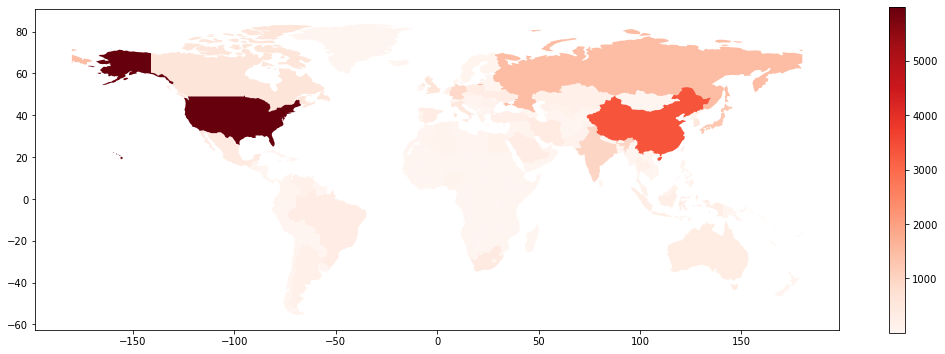

In [24]:
gdf_co2_emissions_2000.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [26]:
df_co2_emissions_2010 = obtener_pais(2010)

In [27]:
gdf_co2_emissions_2010 = pd.merge(world, df_co2_emissions_2010, on='iso_code')
gdf_co2_emissions_2010

,iso_code,geometry,country,year,co2,population
0,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,2010,1.201,859816.0
1,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,2010,6.925,44346532.0
2,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,2010,555.550,34147566.0
3,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,2010,5698.056,309011469.0
4,KAZ,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,2010,250.897,16252273.0
...,...,...,...,...,...,...
162,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,2010,8.500,2070737.0
163,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,2010,45.696,8991258.0
164,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,2010,2.422,624279.0
165,TTO,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,2010,46.959,1328144.0


<AxesSubplot:>

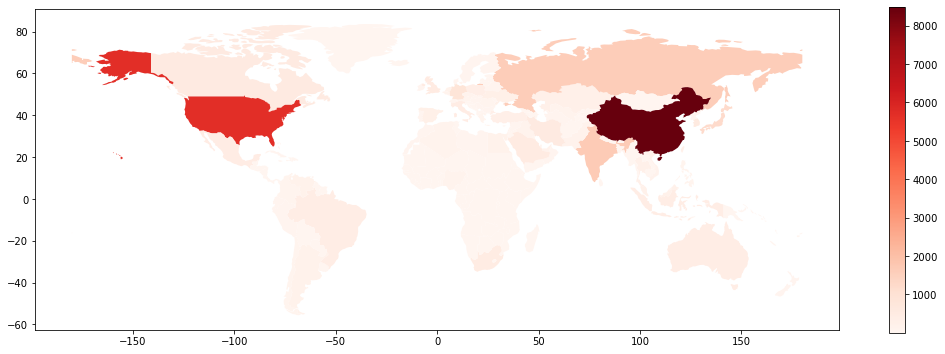

In [28]:
gdf_co2_emissions_2010.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [29]:
df_co2_emissions_2019 = obtener_pais(2019)

<AxesSubplot:>

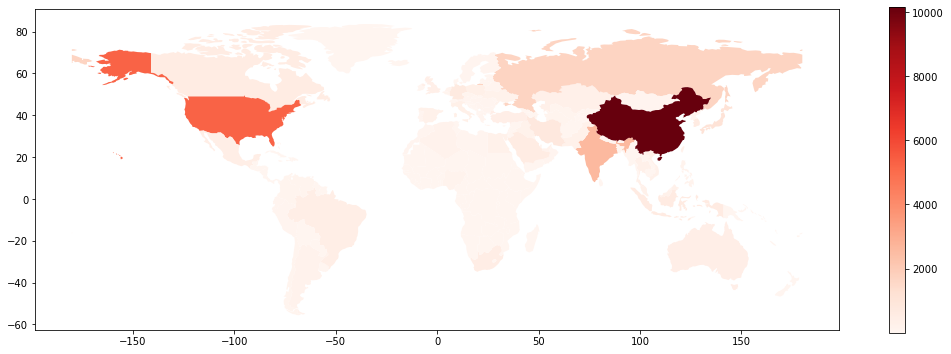

In [30]:
gdf_co2_emissions_2019 = pd.merge(world, df_co2_emissions_2019, on='iso_code')
gdf_co2_emissions_2019
gdf_co2_emissions_2019.plot(figsize = (18, 6), column='co2', legend=True, cmap = 'Reds')

In [31]:
carbono_XX = df_co2_emissions.loc[df_co2_emissions["year"] >= 2000]
carbono_XX = pd.pivot_table(carbono_XX[["co2", "country"]], index = "country", aggfunc = "mean")
carbono_XX

,co2
country,
Afghanistan,5.52250
Albania,4.44085
Algeria,120.71660
Andorra,0.50785
Angola,26.51720
...,...
Venezuela,165.54875
Vietnam,130.22500
Yemen,17.70800


<iframe width="560" height="315" src="https://www.youtube.com/embed/FsX4qHgDlZM" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [44]:
metano = pd.read_csv('metano.csv')
metano.info()
metano.rename(columns = {"Total including LUCF (CH4 emissions, CAIT)" : "Emisión de metano"}, inplace = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 4 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Entity                                      5211 non-null   object 
 1   Code                                        5157 non-null   object 
 2   Year                                        5211 non-null   int64  
 3   Total including LUCF (CH4 emissions, CAIT)  5211 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 163.0+ KB


In [45]:
metano = metano.loc[metano["Year"] >= 2000]
metano_promedio_pais = pd.pivot_table(metano[["Entity", "Emisión de metano"]], index = "Entity", aggfunc = "mean")
metano_promedio_pais.sort_values(by = "Emisión de metano", inplace = True)
metano_promedio_pais = metano_promedio_pais.drop("European Union (27)")
metano_paises = metano_promedio_pais.iloc[-10: -1]
metano_paises

,Emisión de metano
Entity,
Mexico,1.236553e+08
Iran,1.286365e+08
Australia,1.493359e+08
Indonesia,3.472800e+08
Brazil,4.095288e+08
India,6.371382e+08
United States,6.749612e+08
Russia,8.133841e+08
China,1.005464e+09


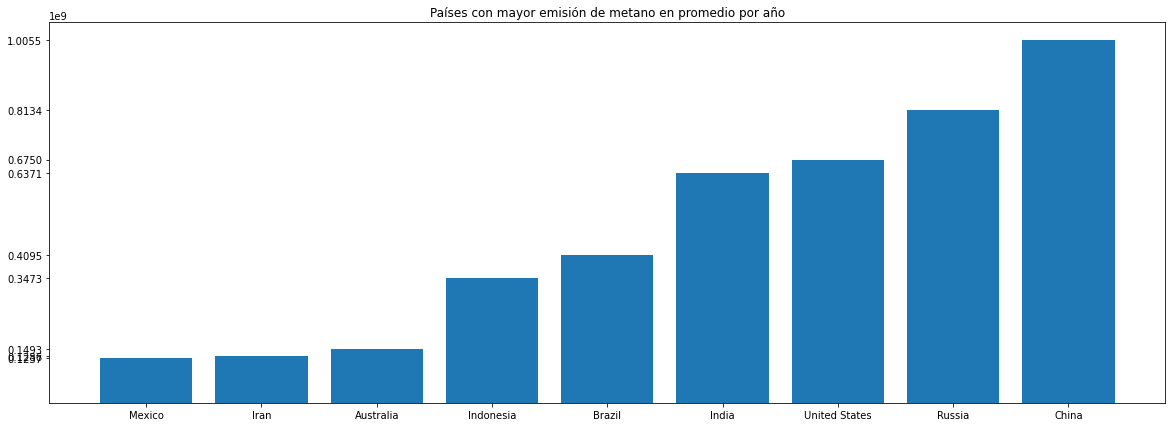

In [46]:
fig = plt.subplots(figsize = (20, 7))
plt.bar(metano_paises.index, metano_paises["Emisión de metano"])
plt.yticks(metano_paises["Emisión de metano"])
plt.title("Países con mayor emisión de metano en promedio por año")
plt.show()

In [47]:
cattle_country = pd.read_csv("cattle-livestock-count-heads.csv")
cattle_country.rename(columns = {'Live Animals - Cattle - 866 - Stocks - 5111 - Head':'Count', 'Entity':'country'}, inplace = True)
cattle_country = cattle_country.loc[(cattle_country['Year'] >= 2000) & (cattle_country['Year'] <= 2020)]
words = ['Asia', 'Central America', 'Northern Africa', 'Oceania', 'Middle Africa', 'Australia & New Zealand', 'Europe, Western', 'South Eastern Asia', 'Western Africa', 'Europe', 'Eastern Europe', 'Eastern Africa', 'Eastern Asia', 'Africa', 'Americas', 'Northern America', 'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries', 'World', 'European Union', 'South America', 'Southern Asia', 'Least Developed Countries', 'Land Locked Developing Countries']
for word in words:
    row = cattle_country.index[cattle_country['country'] == word]
    cattle_country.drop(row, inplace= True)

cattle_country = pd.pivot_table(cattle_country[["country", "Count"]], index = "country", aggfunc = "mean")
cattle_country.sort_values(by = "Count", inplace = True)
index_ = list(cattle_country.index)
index_[-7] = 'Sudan'
cattle_country.index = index_
cattle_country_top = cattle_country.tail(9)

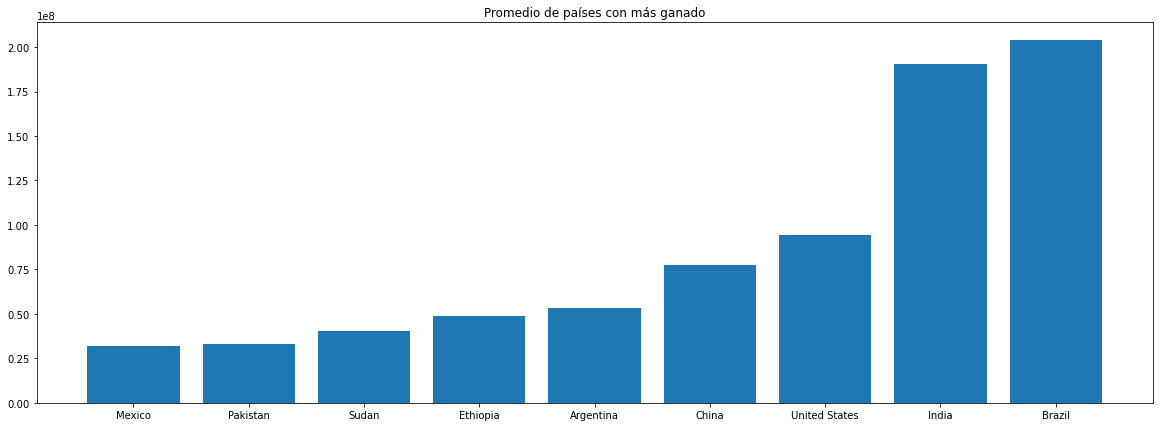

In [48]:
fig = plt.subplots(figsize = (20, 7))
plt.bar(cattle_country_top.index, cattle_country_top["Count"])
#plt.yticks(cattle_country["Emisión de metano"])
plt.title("Promedio de países con más ganado")
plt.show()


In [49]:
cattle_country = cattle_country.merge(df_co2_emissions[["iso_code", "country"]], left_index = True, right_on = "country")
cattle_country.drop_duplicates(inplace = True)

Text(0.5, 1.0, 'Conteo de ganado')

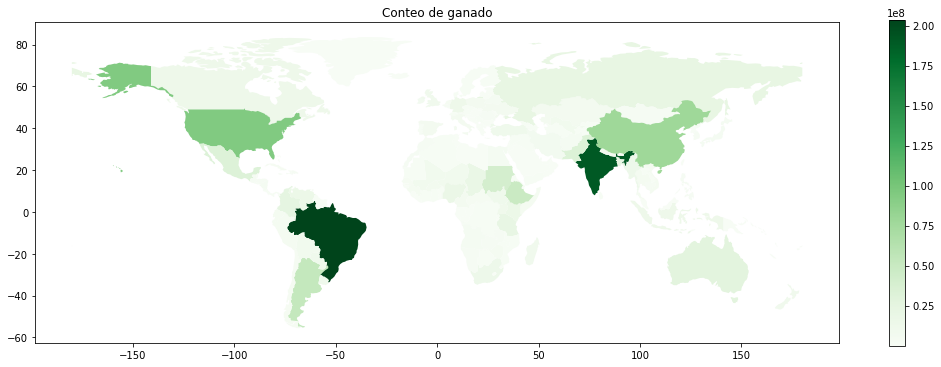

In [50]:
gdf_cattle_country = pd.merge(world[["iso_code", "geometry"]], cattle_country, on='iso_code')
gdf_cattle_country.plot(figsize = (18, 6), column = 'Count', legend=True, cmap = 'Greens')
plt.title("Conteo de ganado")

In [51]:
import datetime as dt
temp = pd.read_csv("GlobalLandTemperatures_GlobalLandTemperaturesByCountry.csv")
temp = temp.loc[temp["Country"] != "Ã…land"]

In [52]:
temp_dt =temp.copy()
temp_dt["dt"] = pd.to_datetime(temp_dt["dt"])

In [53]:
temp_dt["dt"] = temp_dt["dt"].apply(lambda row: row.strftime("%Y"))

In [54]:
fecha = dt.datetime(2000, 1, 1)
fecha = fecha.strftime("%Y")
temp_dt = temp_dt.loc[temp_dt["dt"] >= fecha]
rows = temp_dt.index[temp_dt["Country"] == "Åland"]
temp_dt.drop(rows, inplace = True)

In [55]:
temp_dt2 = pd.pivot_table(temp_dt[["AverageTemperature", "dt", "Country"]], index = "Country", columns = "dt", aggfunc = "mean", fill_value = 0)
temp_dt2

AverageTemperature                                              \
dt                           2000       2001       2002       2003       2004   
Country                                                                         
Afghanistan             15.497833  15.778083  15.537667  14.916000  15.770917   
Africa                  24.588083  24.841167  24.961333  25.025583  24.895917   
Albania                 13.746583  13.690417  13.559917  13.626583  13.258167   
Algeria                 24.032250  24.724417  24.263000  24.393667  23.916000   
American Samoa          27.219833  27.227583  27.537917  27.264833  27.281167   
...                           ...        ...        ...        ...        ...   
Virgin Islands          26.730583  27.133167  27.297833  27.376583  27.029250   
Western Sahara          23.020083  23.704917  23.457833  23.408917  23.420667   
Yemen                   27.436167  27.068917  27.125167  27.357750  27.334083   
Zambia                  21.558750  21.802417  22.292417  22.156750  21.768083   
Zimbabwe                21.149000  21.693667  22.081083  21.891250  21.330917   

                                                                       \
dt                   2005       2006       2007       2008       2009   
Country                                                                 
Afghanistan     14.980000  15.595583  15.106167  15.216500  15.257750   
Africa          25.156167  24.818917  24.851500  24.754667  25.026500   
Albania         12.747083  12.976917  13.890500  13.955167  13.844250   
Algeria         24.222583  24.200833  24.065333  23.950250  24.154333   
American Samoa  27.373500  27.081250  27.452417  26.995083  27.034250   
...                   ...        ...        ...        ...        ...   
Virgin Islands  27.424667  27.374833  27.470000  26.924000  27.238500   
Western Sahara  23.507667  23.441833  23.145417  23.323083  23.381083   
Yemen           27.294667  27.175000  27.310750  26.807500  27.342417   
Zambia          22.813500  21.784250  21.838500  21.535833  21.670250   
Zimbabwe        22.509917  21.618750  21.604250  21.545583  21.377250   

                                                            
dt                   2010       2011       2012       2013  
Country                                                     
Afghanistan     15.828667  15.518000  14.481583  16.533625  
Africa          25.472500  24.786500  24.725917  25.208750  
Albania         13.775417  13.443250  13.768250  14.993875  
Algeria         25.215667  24.144167  23.954833  25.121500  
American Samoa  27.453417  27.009500  27.201417  27.517250  
...                   ...        ...        ...        ...  
Virgin Islands  27.593667  27.159250  27.360167  27.312333  
Western Sahara  24.114250  23.401250  23.303417  23.744250  
Yemen           27.302750  27.288250  27.445000  28.129750  
Zambia          22.267500  21.771583  21.697750  21.196000  
Zimbabwe        21.986250  21.602417  21.521333  20.710750  

[241 rows x 14 columns]

In [56]:
temp_dt2= temp_dt2.merge(df_co2_emissions[["iso_code", "country"]], left_on = "Country",right_on = "country")  
gdf_temp = temp_dt2.merge(world[["iso_code", "geometry"]], on='iso_code')
gdf_temp

C:\Users\Carlota\anaconda3\envs\progra\lib\site-packages\pandas\core\frame.py:9199: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  validate=validate,


,"(AverageTemperature, 2000)","(AverageTemperature, 2001)","(AverageTemperature, 2002)","(AverageTemperature, 2003)","(AverageTemperature, 2004)","(AverageTemperature, 2005)","(AverageTemperature, 2006)","(AverageTemperature, 2007)","(AverageTemperature, 2008)","(AverageTemperature, 2009)","(AverageTemperature, 2010)","(AverageTemperature, 2011)","(AverageTemperature, 2012)","(AverageTemperature, 2013)",iso_code,country,geometry
0,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,15.497833,15.778083,15.537667,14.91600,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625,AFG,Afghanistan,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16140,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16141,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16142,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
16143,21.149000,21.693667,22.081083,21.89125,21.330917,22.509917,21.618750,21.604250,21.545583,21.37725,21.986250,21.602417,21.521333,20.710750,ZWE,Zimbabwe,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [57]:
gdf_temp = gpd.GeoDataFrame(gdf_temp)

<AxesSubplot:>

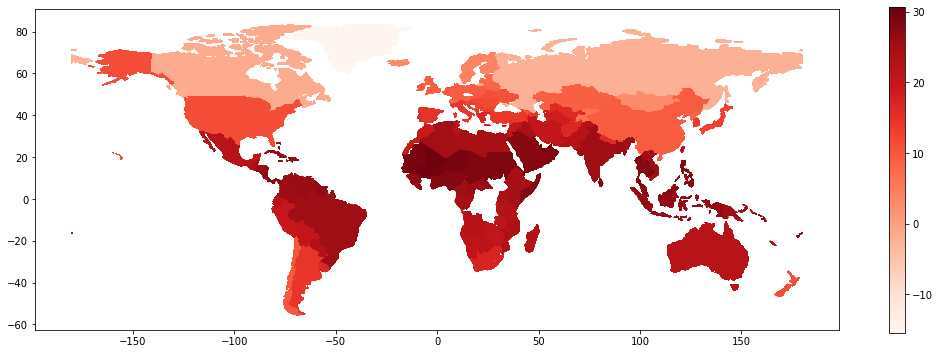

In [58]:
gdf_temp.plot(figsize = (18, 6), column = ('AverageTemperature', '2013'), legend=True, cmap = 'Reds')

# Regresion lineal

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
data = df_co2_emissions.drop(["iso_code", "country"], axis = 1)
data = data.fillna(0)

In [ ]:
sns.pairplot(data, y_vars="co2")

In [ ]:
y = data['co2']
X = data.drop('co2',axis = 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

y_predict_train=lin_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lin_reg.score(X_train, y_train)

y_predict_test=lin_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lin_reg.score(X_test, y_test)

In [ ]:
print(f"R2 train:{r2_train}")
print(f"R2 test: {r2_test}")

mse=cross_val_score(lin_reg, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"Error cuadratico medio: {mean_mse}")

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 45);


print('Coeficientes:',lin_reg.coef_)

In [ ]:
# Se produce overfitting debido a que la cantidad de datos es muy baja, es decir, si quisieramos
# predecir de una mejor manera, deberiamos tener mas datos relacionados al co2

# Ridge

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(X_train, y_train)
    
    Ridge_train_score = rr.score(X_train,y_train)
    Ridge_test_score = rr.score(X_test, y_test)
    mse=cross_val_score(rr, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)

    print(f"R2 train: {Ridge_train_score}")
    print(f"R2 test: {Ridge_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")

    ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns);
ax.legend();

# Lasso

In [ ]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.01) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(X_train, y_train)

    Lasso_train_score = ll.score(X_train,y_train)
    Lasso_test_score = ll.score(X_test, y_test)
    mse=cross_val_score(ll, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)


    print(f"R2 train (Lasso): {Lasso_train_score}")
    print(f"R2 test (Lasso): {Lasso_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")
    ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns);
ax.legend();

# Metano

In [ ]:
df_metano = pd.read_csv('Data_limpio_emisiones_de_metano.csv')
df_metano = df_metano.drop("Unnamed: 0", axis = 1)

# Regresion (Metano)

In [ ]:
data = df_metano.drop(["Country Code" , "Country Name"], axis = 1)

In [ ]:
data

In [ ]:
sns.pairplot(data, y_vars="2018.0")

In [ ]:
y = data['2018.0']
X = data.drop('2018.0',axis = 1)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 100)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)

y_predict_train=lin_reg.predict(X_train)
mse_train=mean_squared_error(y_train, y_predict_train)
r2_train=lin_reg.score(X_train, y_train)

y_predict_test=lin_reg.predict(X_test)
mse_test=mean_squared_error(y_test, y_predict_test)
r2_test=lin_reg.score(X_test, y_test)

In [ ]:
print(f"R2 train:{r2_train}")
print(f"R2 test: {r2_test}")

mse=cross_val_score(lin_reg, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"Error cuadratico medio: {mean_mse}")

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',lin_reg.coef_)

In [ ]:
# Se produce overfitting por la cantidad de datos, hay que eliminar algunos, es decir
# hacer un dataframe mas basico

# Ridge (Metano)

In [ ]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    rr = Ridge(alpha=al) 
    rr.fit(X_train, y_train)
    
    Ridge_train_score = rr.score(X_train,y_train)
    Ridge_test_score = rr.score(X_test, y_test)
    mse=cross_val_score(rr, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)

    print(f"R2 train: {Ridge_train_score}")
    print(f"R2 test: {Ridge_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")

    ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Ridge, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);
ax.legend();

In [ ]:
# De los mejores alpha es el 100

In [ ]:
rr = Ridge(alpha=100) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

mse=cross_val_score(rr, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"R2 train: {Ridge_train_score}")
print(f"R2 test: {Ridge_test_score}")
print(f"Error cuadratico medio: {mean_mse}")

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(rr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',rr.coef_)

In [ ]:
# Hay overfitting por la complejidad de los datos

# Lasso (Metano)

In [ ]:
from sklearn.linear_model import Lasso

ll = Lasso(alpha=0.01) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(lin_reg.coef_,linestyle='none',marker='o',markersize=10,color='r',lw=4,mfc='None')

mk=['x','s','d','*','^']

for na,al in enumerate([0.01,0.1,1,10,100]): 
    print('Alpha:',al)
    ll = Lasso(alpha=al) 
    ll.fit(X_train, y_train)

    Lasso_train_score = ll.score(X_train,y_train)
    Lasso_test_score = ll.score(X_test, y_test)
    mse=cross_val_score(ll, X_test, y_test, cv=5)
    mean_mse=np.mean(mse)


    print(f"R2 train (Lasso): {Lasso_train_score}")
    print(f"R2 test (Lasso): {Lasso_test_score}")
    print(f"Error cuadratico medio: {mean_mse}")
    ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker=mk[na],markersize=7,label='Lasso, alpha=%.2f'%al)

ax.set_xticks(np.arange(len(X.columns)))
ax.set_xticklabels(X.columns, rotation = 90);
ax.legend();

In [ ]:
# Uno de los mejores alpha es el 100

In [ ]:
ll = Lasso(alpha=0.1) 
ll.fit(X_train, y_train)

Lasso_train_score = ll.score(X_train,y_train)
Lasso_test_score = ll.score(X_test, y_test)

mse=cross_val_score(ll, X_test, y_test, cv=5)
mean_mse=np.mean(mse)

print(f"R2 train (Lasso): {Lasso_train_score}")
print(f"R2 test (Lasso): {Lasso_test_score}")
print(f"Error cuadratico medio: {mean_mse}")

In [ ]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
ax.plot(ll.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green')
ax.set_xticks(np.arange(len(X.columns)));
ax.set_xticklabels(X.columns, rotation = 90);


print('Coeficientes:',ll.coef_)

In [ ]:
# Lo mismo de antes, se produce overfitting por la complejidad de los datos

In [ ]:
col_temp = list(gdf_temp.columns)

X = gdf_temp[col_temp[0:-3]]
X